NOTE :
* This report containing implementation details (al-gorithm, initial settings such as sampling the parameters k0, k1 from some distribution, parameter updates one pochs, final parameter values at the end of training, train vs test loss, train and test accuracy, F1-Score, plot of the loss function vs. epochs.


* And Focusing on to recognization of hand written digits. The approach that will be implemented to solve this classification problem is by using the method of Artificial Neutral Network(ANN).

## MNIST :
    * All images are labelled with the respective digit they represent
    * There are 70,000 images, and each image has 784 features
    * Each image is 28*28 pixels, and each features simply represents one pixel's intensity
    from 0 (white) to 255(black)

# Part 1 -Data Preprocessing

In [2]:
#lets import libraries
import tensorflow as keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

# Part 2 Making a ANN classifier

In [11]:
# Training dataset
model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4676 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3042 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2833 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2739 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2665 - accuracy: 0.9263


In [12]:
# test set
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2694 - accuracy: 0.9245: 0s - loss: 0.2988 - 


[0.269359290599823, 0.9244999885559082]

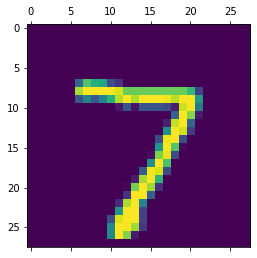

In [13]:
plt.matshow(x_test[0])

In [14]:
y_pred = model.predict(x_test_flatten)
y_pred[0]

array([1.9832432e-02, 3.5694435e-07, 4.1479230e-02, 9.2351276e-01,
       2.9851198e-03, 5.7917833e-02, 9.3269182e-07, 9.9974585e-01,
       7.1989536e-02, 6.5492415e-01], dtype=float32)

In [15]:
np.argmax(y_pred[0])

7

In [16]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    3,    5,    3,    1,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   9,    9,  927,   14,    9,    1,   11,   11,   37,    4],
       [   5,    0,   21,  916,    0,   23,    2,   11,   21,   11],
       [   2,    1,    4,    1,  915,    0,   10,    4,    7,   38],
       [  12,    3,    3,   32,   11,  765,   16,   10,   31,    9],
       [  14,    3,    8,    1,    7,    8,  914,    2,    1,    0],
       [   1,    5,   23,    4,    8,    0,    0,  946,    2,   39],
       [  11,    9,    9,   20,    9,   22,    9,   12,  856,   17],
       [  11,    6,    1,    8,   28,    5,    0,   18,    5,  927]])>

Text(69.0, 0.5, 'Truth')

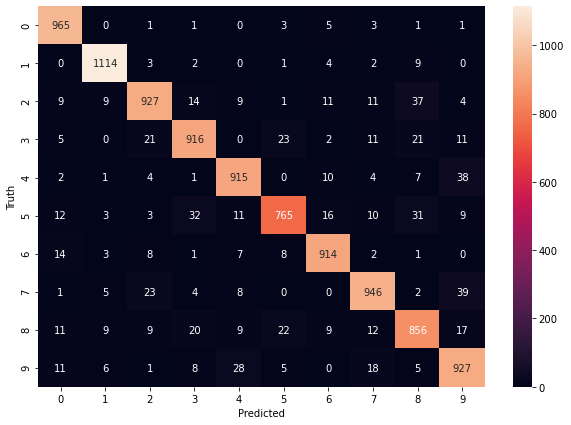

In [18]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# hidden layer(1)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_flatten, y_train, epochs=5, validation_data=(x_test_flatten,y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2712 - accuracy: 0.9234 - val_loss: 0.1511 - val_accuracy: 0.9579
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1238 - accuracy: 0.9642 - val_loss: 0.1205 - val_accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0861 - accuracy: 0.9746 - val_loss: 0.0900 - val_accuracy: 0.9723
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0661 - accuracy: 0.9804 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0825 - val_accuracy: 0.9751


In [20]:
# test set
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9751


[0.0824819877743721, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

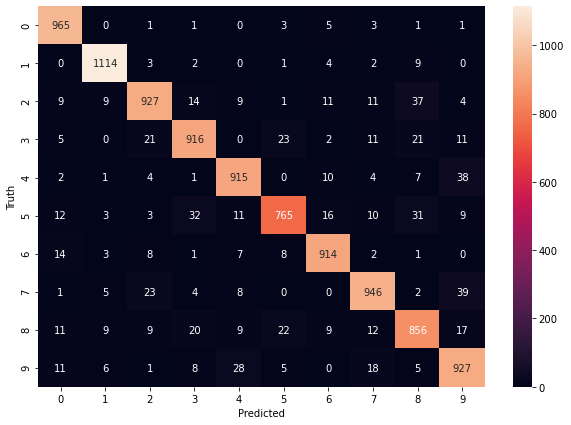

In [21]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 3 Visualizing the results

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


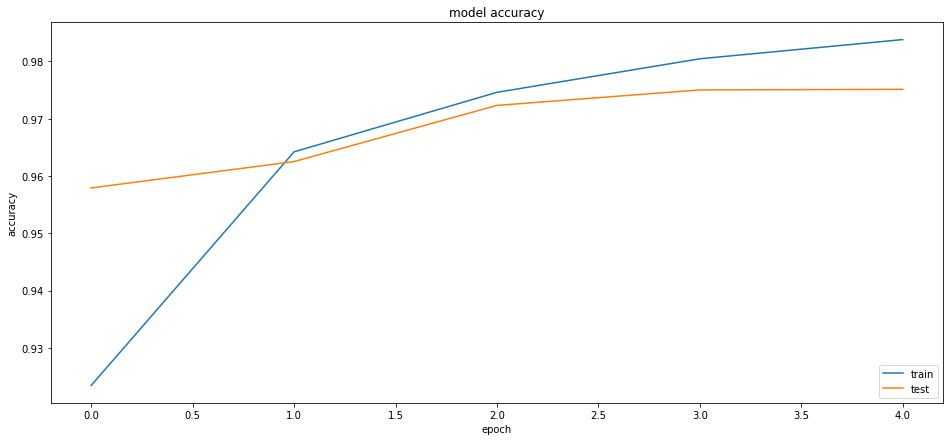

In [23]:
# summarize history for accuracy
fig = plt.subplots(figsize=(16,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

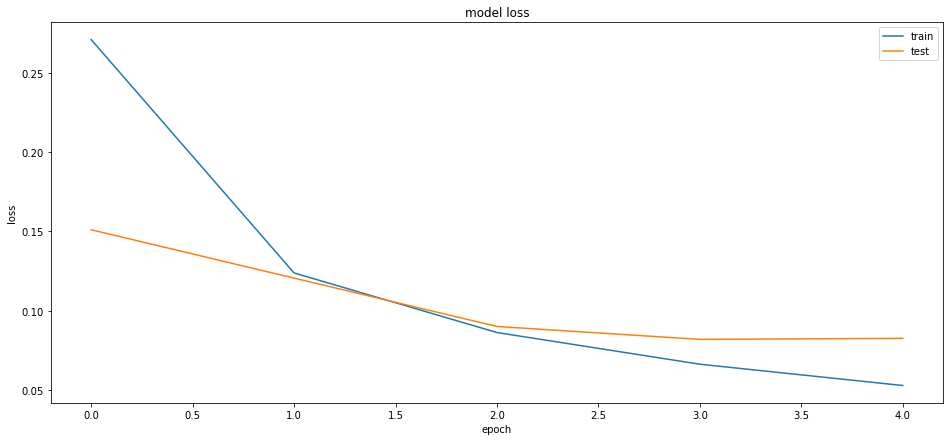

In [24]:
# summarize history for loss
fig = plt.subplots(figsize=(16,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()